<a href="https://colab.research.google.com/github/NicolasZucker/NicolasZucker/blob/main/ProjetBioPhyGenom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

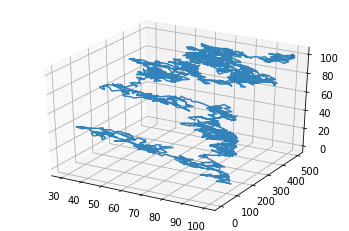

<Figure size 432x288 with 0 Axes>

In [24]:
def bounded_random_walk(length, lower_bound,  upper_bound, start, end, std):
    assert (lower_bound <= start and lower_bound <= end)
    assert (start <= upper_bound and end <= upper_bound)

    bounds = upper_bound - lower_bound

    rand = (std * (np.random.random(length) - 0.5)).cumsum()
    rand_trend = np.linspace(rand[0], rand[-1], length)
    rand_deltas = (rand - rand_trend)
    rand_deltas /= np.max([1, (rand_deltas.max()-rand_deltas.min())/bounds])

    trend_line = np.linspace(start, end, length)
    upper_bound_delta = upper_bound - trend_line
    lower_bound_delta = lower_bound - trend_line

    upper_slips_mask = (rand_deltas-upper_bound_delta) >= 0
    upper_deltas =  rand_deltas - upper_bound_delta
    rand_deltas[upper_slips_mask] = (upper_bound_delta - upper_deltas)[upper_slips_mask]

    lower_slips_mask = (lower_bound_delta-rand_deltas) >= 0
    lower_deltas =  lower_bound_delta - rand_deltas
    rand_deltas[lower_slips_mask] = (lower_bound_delta + lower_deltas)[lower_slips_mask]

    return trend_line + rand_deltas

randomDatax = bounded_random_walk(2000, lower_bound=0, upper_bound =100, start=50, end=100, std=10)
randomDatay = bounded_random_walk(2000, lower_bound=0, upper_bound =500, start=0, end=500, std=10)
randomDataz = bounded_random_walk(2000, lower_bound=0, upper_bound =100, start=50, end=100, std=10)

ax = plt.subplot(1,1,1, projection='3d')
plt.figure()
ax.plot(randomDatax, randomDatay, randomDataz,alpha=0.9) #alpha sets the darkness of the path.
ax.scatter(randomDatax[-1],randomDatay[-1],randomDataz[-1])
plt.show()